In [104]:
import pandas as pd
import json
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
main_data = pd.read_csv("Main_data.csv")
fraud_label = pd.read_csv("fraud_Label.csv")

In [106]:
main_data

,profile_id,collection_event_timestamp,collection_event_date,sessions,external_properties_json
0,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,36:12.0,13/04/2024,SSN-/1NjPY04d+dwLGdF6Y8uq1YXwjhDjxW4RqVXW0vgGbk=,"{""browser_name"":""Chrome"",""browser_version"":""12..."
1,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,35:06.0,13/04/2024,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,"{""browser_name"":""Mobile Safari"",""browser_versi..."
2,PF-AUKF0FEu56+e8UHput9+ErQYsvZOpgoyJEHMLrPKJFA=,35:22.0,13/04/2024,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,"{""browser_name"":""Mobile Safari"",""browser_versi..."
3,PF-5qVHJkUNTy1gvxChmRBImqbN8kHkoSLDvybaUrcv/wM=,47:41.0,27/04/2024,SSN-/IrhkjiiGuWd+nSMgXdyqKyVay2StKoNnXd/2g2RRtA=,"{""browser_name"":"""",""browser_version"":"""",""devic..."
4,PF-R31cK/yZpkGCWJExCokm7bfMamqc1hTal6/gaovMpxU=,02:41.0,27/04/2024,SSN-/LvvXATrsg6Cmr5UbbiU7eWLaxpWQWDjH9cEL4wHvyU=,"{""browser_name"":""Chrome"",""browser_version"":""12..."
...,...,...,...,...,...
995,PF-v4dzv6CHv7EwKzi7/atRZ1oatLPuHiG9u+MjXSm/1ds=,17:52.0,27/04/2024,SSN-zWhuRDJd+KChBSbYdEPBL4+NtBQ6DKKN7Z3VLS4UuRM=,"{""browser_name"":""Mobile Safari"",""browser_versi..."
996,PF-EOJYhoytQ7UqkfUYr4SQWu/QCUXaAcdYMWmq4yzQ4P8=,45:59.0,29/04/2024,SSN-zWr1IGBVBBJ3WEr1WBO0w86ldleCUjpzIDWZXwFu/+U=,"{""browser_name"":""Chrome Mobile"",""browser_versi..."
997,PF-4D1L4fGKGve/ogrowixWv2ekFl8Q2zHRrDLbD3zJpXQ=,47:29.0,29/04/2024,SSN-Zww7kqTSiaCf6aLL1AoU6IEGOpoSQYasXbrl/+eMT3A=,"{""browser_name"":""Chromium"",""browser_version"":""..."
998,PF-YJpA4sbAq/48K2yLMQZYOL2eC+BpF/VC0ydsDDVAYt8=,58:39.0,27/04/2024,SSN-ZZML0cRuYnTP65jRatfFCvIp+gjvV62XyH3y41rmLoU=,"{""browser_name"":""Chrome Mobile"",""browser_versi..."


In [107]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   profile_id                  1000 non-null   object
 1   collection_event_timestamp  1000 non-null   object
 2   collection_event_date       1000 non-null   object
 3   sessions                    1000 non-null   object
 4   external_properties_json    1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [108]:
fraud_label

,sessions,status
0,SSN-/1NjPY04d+dwLGdF6Y8uq1YXwjhDjxW4RqVXW0vgGbk=,FRAUD
1,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,FRAUD
2,SSN-/IrhkjiiGuWd+nSMgXdyqKyVay2StKoNnXd/2g2RRtA=,FRAUD
3,SSN-/LvvXATrsg6Cmr5UbbiU7eWLaxpWQWDjH9cEL4wHvyU=,FRAUD
4,SSN-/MFcG0Ze+sJMuABFbJGpsTtxUp02B3MAAbG5M3VnKJU=,FRAUD
5,SSN-/N7Tjso1yhCTfOuJclJZTqEKhLrlU8NoQDk8ziAu9YY=,FRAUD
6,SSN-/n7TQHptMiye2AJOCH6ukGU/faO4uhHFcCX5yV/OzLQ=,FRAUD
7,SSN-/NYrn7tgGTC7N0kMGZmg/C58Y51WApzisvQ7YJDolmc=,FRAUD
8,SSN-/oZ5sQVVv+rGlrkuPM/G4WsBKFRcWxGdbBpBoDYXnvE=,FRAUD
9,SSN-/S49otG5/5+2cYLAJa6u1u47b1bIye+W11Bc7F9G9d8=,FRAUD


In [109]:
fraud_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sessions  49 non-null     object
 1   status    49 non-null     object
dtypes: object(2)
memory usage: 916.0+ bytes


Separating the json values in `"external_properties_json"` into independent columns



In [110]:
main_data['external_properties_json'] = main_data['external_properties_json'].apply(json.loads)
external_df = pd.json_normalize(main_data['external_properties_json'])

cleaned_main = pd.concat([main_data.drop(columns=['external_properties_json']), external_df], axis=1)

In [111]:
cleaned_main

,profile_id,collection_event_timestamp,collection_event_date,sessions,browser_name,browser_version,device_os,device_os_version,device_brand,device_model,device_form_factor
0,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,36:12.0,13/04/2024,SSN-/1NjPY04d+dwLGdF6Y8uq1YXwjhDjxW4RqVXW0vgGbk=,Chrome,123.0,Windows,11,Google,Chrome,Desktop
1,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,35:06.0,13/04/2024,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,Mobile Safari,15.1,iOS,15.1,Apple,iPhone,Smartphone
2,PF-AUKF0FEu56+e8UHput9+ErQYsvZOpgoyJEHMLrPKJFA=,35:22.0,13/04/2024,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,Mobile Safari,15.1,iOS,15.1,Apple,iPhone,Smartphone
3,PF-5qVHJkUNTy1gvxChmRBImqbN8kHkoSLDvybaUrcv/wM=,47:41.0,27/04/2024,SSN-/IrhkjiiGuWd+nSMgXdyqKyVay2StKoNnXd/2g2RRtA=,,,,,,,Desktop
4,PF-R31cK/yZpkGCWJExCokm7bfMamqc1hTal6/gaovMpxU=,02:41.0,27/04/2024,SSN-/LvvXATrsg6Cmr5UbbiU7eWLaxpWQWDjH9cEL4wHvyU=,Chrome,124.0,Windows,10,Google,Chrome,Desktop
...,...,...,...,...,...,...,...,...,...,...,...
995,PF-v4dzv6CHv7EwKzi7/atRZ1oatLPuHiG9u+MjXSm/1ds=,17:52.0,27/04/2024,SSN-zWhuRDJd+KChBSbYdEPBL4+NtBQ6DKKN7Z3VLS4UuRM=,Mobile Safari,16.6,iOS,16.7.7,Apple,iPhone,Smartphone
996,PF-EOJYhoytQ7UqkfUYr4SQWu/QCUXaAcdYMWmq4yzQ4P8=,45:59.0,29/04/2024,SSN-zWr1IGBVBBJ3WEr1WBO0w86ldleCUjpzIDWZXwFu/+U=,Chrome Mobile,124.0,Android,14.0.0,Generic,Android 4.0,Feature Phone
997,PF-4D1L4fGKGve/ogrowixWv2ekFl8Q2zHRrDLbD3zJpXQ=,47:29.0,29/04/2024,SSN-Zww7kqTSiaCf6aLL1AoU6IEGOpoSQYasXbrl/+eMT3A=,Chromium,123.0,Android,14.0.0,Generic,Android 4.0,Feature Phone
998,PF-YJpA4sbAq/48K2yLMQZYOL2eC+BpF/VC0ydsDDVAYt8=,58:39.0,27/04/2024,SSN-ZZML0cRuYnTP65jRatfFCvIp+gjvV62XyH3y41rmLoU=,Chrome Mobile,124.0,Android,14.0.0,Generic,Android 4.0,Feature Phone


Merging the datasets on the `sessions` column




In [112]:
df = pd.merge(cleaned_main, fraud_label, on='sessions', how='left')

In [113]:
df

,profile_id,collection_event_timestamp,collection_event_date,sessions,browser_name,browser_version,device_os,device_os_version,device_brand,device_model,device_form_factor,status
0,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,36:12.0,13/04/2024,SSN-/1NjPY04d+dwLGdF6Y8uq1YXwjhDjxW4RqVXW0vgGbk=,Chrome,123.0,Windows,11,Google,Chrome,Desktop,FRAUD
1,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,35:06.0,13/04/2024,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,Mobile Safari,15.1,iOS,15.1,Apple,iPhone,Smartphone,FRAUD
2,PF-AUKF0FEu56+e8UHput9+ErQYsvZOpgoyJEHMLrPKJFA=,35:22.0,13/04/2024,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,Mobile Safari,15.1,iOS,15.1,Apple,iPhone,Smartphone,FRAUD
3,PF-5qVHJkUNTy1gvxChmRBImqbN8kHkoSLDvybaUrcv/wM=,47:41.0,27/04/2024,SSN-/IrhkjiiGuWd+nSMgXdyqKyVay2StKoNnXd/2g2RRtA=,,,,,,,Desktop,FRAUD
4,PF-R31cK/yZpkGCWJExCokm7bfMamqc1hTal6/gaovMpxU=,02:41.0,27/04/2024,SSN-/LvvXATrsg6Cmr5UbbiU7eWLaxpWQWDjH9cEL4wHvyU=,Chrome,124.0,Windows,10,Google,Chrome,Desktop,FRAUD
...,...,...,...,...,...,...,...,...,...,...,...,...
995,PF-v4dzv6CHv7EwKzi7/atRZ1oatLPuHiG9u+MjXSm/1ds=,17:52.0,27/04/2024,SSN-zWhuRDJd+KChBSbYdEPBL4+NtBQ6DKKN7Z3VLS4UuRM=,Mobile Safari,16.6,iOS,16.7.7,Apple,iPhone,Smartphone,NaN
996,PF-EOJYhoytQ7UqkfUYr4SQWu/QCUXaAcdYMWmq4yzQ4P8=,45:59.0,29/04/2024,SSN-zWr1IGBVBBJ3WEr1WBO0w86ldleCUjpzIDWZXwFu/+U=,Chrome Mobile,124.0,Android,14.0.0,Generic,Android 4.0,Feature Phone,NaN
997,PF-4D1L4fGKGve/ogrowixWv2ekFl8Q2zHRrDLbD3zJpXQ=,47:29.0,29/04/2024,SSN-Zww7kqTSiaCf6aLL1AoU6IEGOpoSQYasXbrl/+eMT3A=,Chromium,123.0,Android,14.0.0,Generic,Android 4.0,Feature Phone,NaN
998,PF-YJpA4sbAq/48K2yLMQZYOL2eC+BpF/VC0ydsDDVAYt8=,58:39.0,27/04/2024,SSN-ZZML0cRuYnTP65jRatfFCvIp+gjvV62XyH3y41rmLoU=,Chrome Mobile,124.0,Android,14.0.0,Generic,Android 4.0,Feature Phone,NaN


In [114]:
df["status"].describe()

,status
count,50
unique,1
top,FRAUD
freq,50


In [115]:
print(df['status'].unique())

['FRAUD' nan]


Replacing `"FRAUD"` in the `"status"` column with 1 and `nan` (Authentic Transaction) with 0

In [116]:
df['status'] = df['status'].apply(lambda val: 1 if val == 'FRAUD' else val)
df['status'] = df['status'].fillna(0).astype(int)

In [117]:
df['status'].unique()

array([1, 0])

Handling `"collection_event_date"` format

In [118]:
df['collection_event_date'] = pd.to_datetime(df['collection_event_date'], format='%d/%m/%Y')

In [119]:
df

,profile_id,collection_event_timestamp,collection_event_date,sessions,browser_name,browser_version,device_os,device_os_version,device_brand,device_model,device_form_factor,status
0,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,36:12.0,2024-04-13,SSN-/1NjPY04d+dwLGdF6Y8uq1YXwjhDjxW4RqVXW0vgGbk=,Chrome,123.0,Windows,11,Google,Chrome,Desktop,1
1,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,35:06.0,2024-04-13,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,Mobile Safari,15.1,iOS,15.1,Apple,iPhone,Smartphone,1
2,PF-AUKF0FEu56+e8UHput9+ErQYsvZOpgoyJEHMLrPKJFA=,35:22.0,2024-04-13,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,Mobile Safari,15.1,iOS,15.1,Apple,iPhone,Smartphone,1
3,PF-5qVHJkUNTy1gvxChmRBImqbN8kHkoSLDvybaUrcv/wM=,47:41.0,2024-04-27,SSN-/IrhkjiiGuWd+nSMgXdyqKyVay2StKoNnXd/2g2RRtA=,,,,,,,Desktop,1
4,PF-R31cK/yZpkGCWJExCokm7bfMamqc1hTal6/gaovMpxU=,02:41.0,2024-04-27,SSN-/LvvXATrsg6Cmr5UbbiU7eWLaxpWQWDjH9cEL4wHvyU=,Chrome,124.0,Windows,10,Google,Chrome,Desktop,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,PF-v4dzv6CHv7EwKzi7/atRZ1oatLPuHiG9u+MjXSm/1ds=,17:52.0,2024-04-27,SSN-zWhuRDJd+KChBSbYdEPBL4+NtBQ6DKKN7Z3VLS4UuRM=,Mobile Safari,16.6,iOS,16.7.7,Apple,iPhone,Smartphone,0
996,PF-EOJYhoytQ7UqkfUYr4SQWu/QCUXaAcdYMWmq4yzQ4P8=,45:59.0,2024-04-29,SSN-zWr1IGBVBBJ3WEr1WBO0w86ldleCUjpzIDWZXwFu/+U=,Chrome Mobile,124.0,Android,14.0.0,Generic,Android 4.0,Feature Phone,0
997,PF-4D1L4fGKGve/ogrowixWv2ekFl8Q2zHRrDLbD3zJpXQ=,47:29.0,2024-04-29,SSN-Zww7kqTSiaCf6aLL1AoU6IEGOpoSQYasXbrl/+eMT3A=,Chromium,123.0,Android,14.0.0,Generic,Android 4.0,Feature Phone,0
998,PF-YJpA4sbAq/48K2yLMQZYOL2eC+BpF/VC0ydsDDVAYt8=,58:39.0,2024-04-27,SSN-ZZML0cRuYnTP65jRatfFCvIp+gjvV62XyH3y41rmLoU=,Chrome Mobile,124.0,Android,14.0.0,Generic,Android 4.0,Feature Phone,0


To drop redundant columns we need to know the correlations first

In [120]:
def encode_non_numeric_columns(df):
    label_encoders = {}
    encoded_df = df.copy()
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
    return encoded_df, label_encoders

In [121]:
def plot_correlation_heatmap(df, method='spearman'):
    correlation_matrix = df.corr(method=method)
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix ({method.capitalize()} Method)")
    plt.show()
    return correlation_matrix



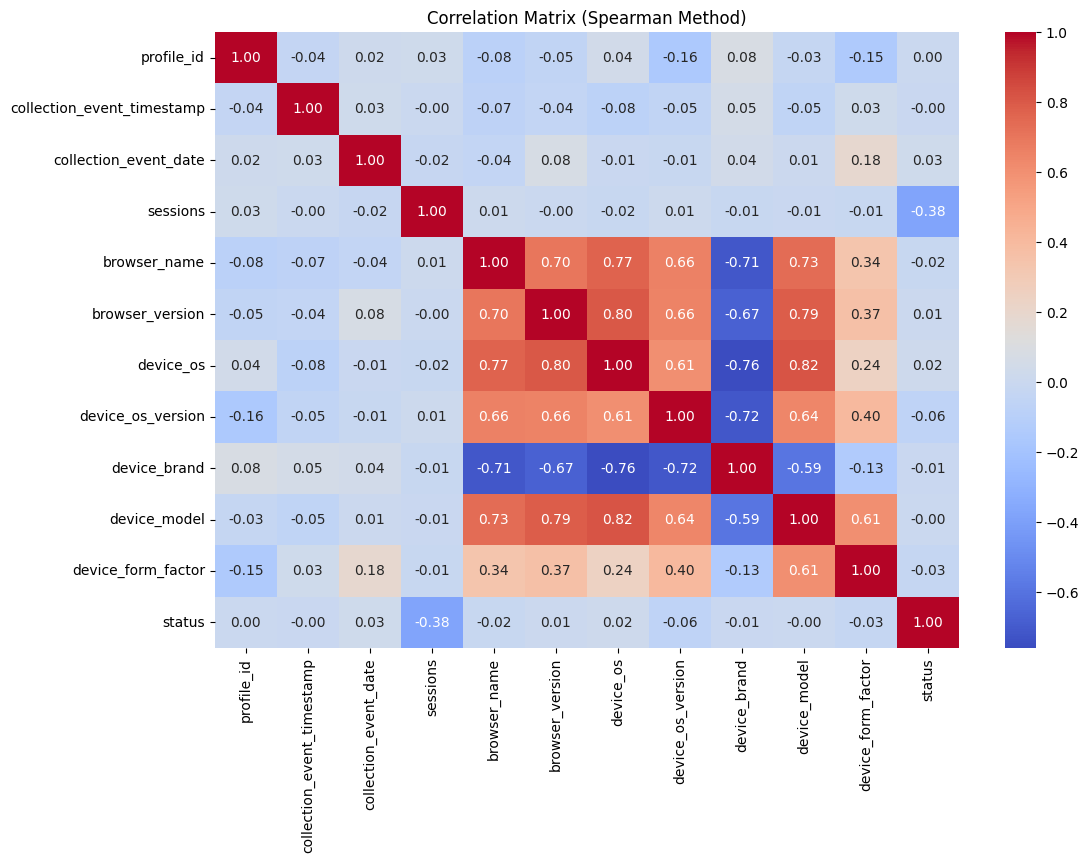

Top Feature Correlations:
profile_id         profile_id         1.000000
device_model       device_os          0.820694
device_os          browser_version    0.804337
browser_version    device_model       0.791434
device_os          browser_name       0.767196
                                        ...   
device_brand       device_model      -0.593934
browser_version    device_brand      -0.672688
device_brand       browser_name      -0.714977
device_os_version  device_brand      -0.717357
device_brand       device_os         -0.759712
Length: 67, dtype: float64


In [122]:
encoded_df, label_encoders = encode_non_numeric_columns(df)
correlation_matrix = plot_correlation_heatmap(encoded_df)
top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("Top Feature Correlations:")
print(top_correlations)

`"device_os"` is strongly correlated with many features so we only need one

In [123]:
df = df.drop(columns=["device_model", "browser_version", "browser_name", "device_brand"])

In [124]:
df

,profile_id,collection_event_timestamp,collection_event_date,sessions,device_os,device_os_version,device_form_factor,status
0,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,36:12.0,2024-04-13,SSN-/1NjPY04d+dwLGdF6Y8uq1YXwjhDjxW4RqVXW0vgGbk=,Windows,11,Desktop,1
1,PF-tlvht1a1AVFJjvyOo62lmIpRrM7daI4j8/jYVOxzCHI=,35:06.0,2024-04-13,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,iOS,15.1,Smartphone,1
2,PF-AUKF0FEu56+e8UHput9+ErQYsvZOpgoyJEHMLrPKJFA=,35:22.0,2024-04-13,SSN-/Aa7H92wx3PDf0/xJCSMlff67hnEJPjWLs/P9O8mCPs=,iOS,15.1,Smartphone,1
3,PF-5qVHJkUNTy1gvxChmRBImqbN8kHkoSLDvybaUrcv/wM=,47:41.0,2024-04-27,SSN-/IrhkjiiGuWd+nSMgXdyqKyVay2StKoNnXd/2g2RRtA=,,,Desktop,1
4,PF-R31cK/yZpkGCWJExCokm7bfMamqc1hTal6/gaovMpxU=,02:41.0,2024-04-27,SSN-/LvvXATrsg6Cmr5UbbiU7eWLaxpWQWDjH9cEL4wHvyU=,Windows,10,Desktop,1
...,...,...,...,...,...,...,...,...
995,PF-v4dzv6CHv7EwKzi7/atRZ1oatLPuHiG9u+MjXSm/1ds=,17:52.0,2024-04-27,SSN-zWhuRDJd+KChBSbYdEPBL4+NtBQ6DKKN7Z3VLS4UuRM=,iOS,16.7.7,Smartphone,0
996,PF-EOJYhoytQ7UqkfUYr4SQWu/QCUXaAcdYMWmq4yzQ4P8=,45:59.0,2024-04-29,SSN-zWr1IGBVBBJ3WEr1WBO0w86ldleCUjpzIDWZXwFu/+U=,Android,14.0.0,Feature Phone,0
997,PF-4D1L4fGKGve/ogrowixWv2ekFl8Q2zHRrDLbD3zJpXQ=,47:29.0,2024-04-29,SSN-Zww7kqTSiaCf6aLL1AoU6IEGOpoSQYasXbrl/+eMT3A=,Android,14.0.0,Feature Phone,0
998,PF-YJpA4sbAq/48K2yLMQZYOL2eC+BpF/VC0ydsDDVAYt8=,58:39.0,2024-04-27,SSN-ZZML0cRuYnTP65jRatfFCvIp+gjvV62XyH3y41rmLoU=,Android,14.0.0,Feature Phone,0


Checking for missing values and unconventional placeholders like empty string in the new dataframe


In [125]:
def check_unconventional_placeholders(df, placeholders=None):
    if placeholders is None:
        placeholders = ["", " ", -1, "N/A", "NULL", "NaN"]

    result = {}
    for col in df.columns:
        placeholder_counts = {str(ph): (df[col] == ph).sum() for ph in placeholders}
        total_placeholders = sum(placeholder_counts.values())
        if total_placeholders > 0:
            result[col] = placeholder_counts
    return result

unconventional_placeholders = check_unconventional_placeholders(df)
print("Unconventional placeholders detected:")
print(unconventional_placeholders)



Unconventional placeholders detected:
{'device_os': {'': 11, ' ': 0, '-1': 0, 'N/A': 0, 'NULL': 0, 'NaN': 0}, 'device_os_version': {'': 19, ' ': 0, '-1': 0, 'N/A': 0, 'NULL': 0, 'NaN': 0}}


Now to decide wether to drop them or correct the discrepeancy

In [126]:
total_rows = len(df)
percentages = {}
for col, counts in unconventional_placeholders.items():
    total_placeholders = sum(counts.values())
    percentages[col] = (total_placeholders / total_rows) * 100

print("\nPercentage of unconventional values per column:")
print(percentages)





Percentage of unconventional values per column:
{'device_os': 1.0999999999999999, 'device_os_version': 1.9}


The amount of unconventional placeholders is a small percentage of our overall data, we drop


In [127]:
placeholders = ["", " ", -1, "N/A", "NULL", "NaN"]
df_cleaned = df[~df['device_os'].isin(placeholders) & ~df['device_os_version'].isin(placeholders)]



In [128]:
print(f"Rows before cleaning: {len(df)}")


Rows before cleaning: 1000


In [129]:
print(f"Rows after cleaning: {len(df_cleaned)}")

Rows after cleaning: 981
